# 1

# 2

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [28]:
df = pd.read_csv('sgn.csv')
m = [1, 5, 20, 100, 1000]
model = LinearRegression()

for k in m:
  x = df['x'][:k].to_numpy()
  y = df['y'][:k].to_numpy()
  X = np.hstack([np.hstack([np.array([np.sin(m*x)]).T,np.array([np.cos(m*x)]).T]) for m in range(1, k + 1)])
  
  model.fit(X, y)

  print(f'm = {k}')
  print(f'b0 = {model.intercept_}')
  print(model.coef_)
  print()
  y_pred = model.predict(X)
  sns.lineplot(x=x, y=y_pred)
  sns.scatterplot(x=x, y=y)

m = 1
b0 = -0.9717565055116784
[0. 0.]

m = 5
b0 = -2531877.7831394672
[   -5973.02290202  -411714.18143428     2822.27337184   573656.39580612
   -67735.98175548 -1896560.73037169    77097.50482786  1221541.94998834
   104632.01970761  1571596.44621747]

m = 20
b0 = 10470735970046.63
[-5.71916594e+12  1.91731202e+12 -2.97903630e+11 -9.46141210e+12
  5.33029141e+12 -1.83706950e+12 -2.99181943e+12 -5.54444943e+12
 -6.95776678e+11  4.19680225e+11 -4.74943572e+12  7.45546139e+12
 -7.55153762e+12  5.94596210e+12  6.69516781e+12  7.72436220e+12
 -3.48275655e+12 -2.64986417e+12  1.04253174e+13 -1.00714026e+13
  4.17479034e+13  5.12535338e+12  1.43502638e+13  1.52250956e+13
 -6.46416196e+12 -1.43740567e+12 -3.71468493e+12 -2.72612099e+13
 -1.81614321e+13 -2.60646403e+13 -2.71833479e+12  3.73500297e+12
  2.89777207e+13  2.49618120e+13  2.37722586e+13  2.12579126e+13
  5.35530335e+12  8.63685972e+12 -8.14537049e+10  1.48790307e+12]

m = 100
b0 = -1055967264770.9766
[-3.13992494e+11  3.75060249e

# 3

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import *

m = 1000
b0 = -0.004452634115688674
[ 1.16231549e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
 -5.83797275e-14 -0.00000000e+00]


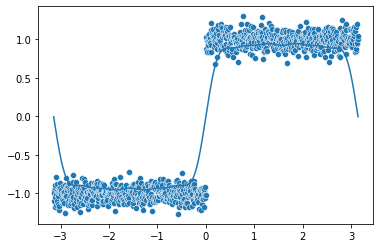

In [32]:
df = pd.read_csv('sgn.csv')

m = 1000

x = df['x'][:N].to_numpy()
y = df['y'][:N].to_numpy()
X = np.hstack([np.hstack([np.array([np.sin(m*x)]).T, np.array([np.cos(m*x)]).T]) for m in range(1, m + 1)])

model = LassoCV()
model.fit(X, y)

print(f'm = {k}')
print(f'b0 = {model.intercept_}')
print(model.coef_)

y_pred = model.predict(X)
sns.lineplot(x=x, y=y_pred)
sns.scatterplot(x=x, y=y)

# 4

# SVC

In [41]:
import pandas as pd

from sklearn.svm import SVC
from sklearn.metrics import *
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

In [39]:
df = pd.read_csv("BRCA_pam50.tsv", sep="\t", index_col=0)
df = df.loc[df["Subtype"].isin(["Luminal A", "Luminal B"])]

X = df.iloc[:, :-1].to_numpy()
y = df["Subtype"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=17)
model = SVC(kernel="linear", class_weight="balanced")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(balanced_accuracy_score(y_test, y_pred))

genes = df.columns[np.argsort(np.abs(model.coef_[0]))][::-1][:2].to_list()

0.8862389193752638


# SVC top-2

In [40]:
df = pd.read_csv("BRCA_pam50.tsv", sep="\t", index_col=0)
df = df.loc[df["Subtype"].isin(["Luminal A", "Luminal B"]), genes + ['Subtype']]

X = df.iloc[:, :-1].to_numpy()
y = df["Subtype"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=17)
model = SVC(kernel="linear", class_weight="balanced")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(balanced_accuracy_score(y_test, y_pred))

0.7747994934571549


# LogisticRegression

In [42]:
df = pd.read_csv("BRCA_pam50.tsv", sep="\t", index_col=0)
df = df.loc[df["Subtype"].isin(["Luminal A", "Luminal B"])]

X = df.iloc[:, :-1].to_numpy()
y = df["Subtype"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=17)
model = LogisticRegression(class_weight='balanced', C = 0.01, 
                           penalty='l1', solver='liblinear')

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(balanced_accuracy_score(y_test, y_pred))

0.8448712536935415


# 5

In [43]:
from scipy.stats import *
import numpy as np

In [51]:
np.random.seed(17)
N = 20
M = 10000
count = 0
for i in range(M):
  X = np.random.normal(loc=0, size=(N, 2))
  y = ['one']*10 + ['two']*10

  X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=17)
  
  model = LogisticRegression(penalty="none")

  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  if balanced_accuracy_score(y_test, y_pred) == 1:
    count += 1

print(count)

223
